In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled = StandardScaler().fit_transform(df_market_data)
crypto_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [6]:
# Create a DataFrame with the scaled data
crypto_transformed = pd.DataFrame(crypto_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d',	'price_change_percentage_1y'])
crypto_transformed

# Copy the crypto names from the original data
coins = list(df_market_data.index) 
coins
# Set the coinid column as index
crypto_transformed['coin_id'] = coins  
crypto_transformed = crypto_transformed.set_index('coin_id') 

# Display sample data
crypto_transformed

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# Create an empty list to store the inertia values
inertia1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(crypto_transformed)
    inertia1.append(k_model.inertia_)


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia1}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


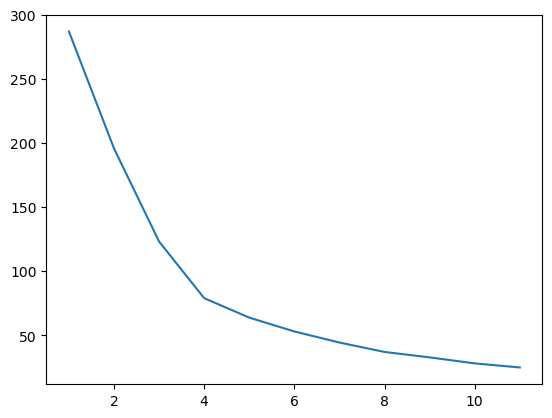

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(k, inertia1)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(crypto_transformed)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k4 = model.predict(crypto_transformed)

# Print the resulting array of cluster values.
k4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
clusters_predicted = crypto_transformed.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
clusters_predicted['predicted_cluster'] = k4

# Display sample data
clusters_predicted.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [20]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

clusters_predicted.hvplot.scatter(x="price_change_percentage_24h",
                                  y="price_change_percentage_7d", 
                                  by="predicted_cluster", 
                                  hover_cols="coin_id")


:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
clusters_pca = pca.fit_transform(clusters_predicted)
# View the first five rows of the DataFrame. 
clusters_pca[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

In [24]:
sum(pca.explained_variance_ratio_)

0.8886218549859446

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.34871677 + 0.31363391 + 0.22627118 = 0.88862186

In [25]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
clusters_pca_df = pd.DataFrame(clusters_pca, columns=["PCA1", "PCA2", "PCA3"])
clusters_pca_df

clusters_pca_df['coin_id'] = list(clusters_predicted.index)
clusters_pca_df

clusters_pca_df = clusters_pca_df.set_index('coin_id')

clusters_pca_df





,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321
binancecoin,0.822871,-1.682096,-0.905203
chainlink,0.913868,-1.128684,-2.730038
cardano,0.811102,-1.113378,-1.598655
litecoin,0.258728,-0.946884,-1.103560


---

### Find the Best Value for k Using the PCA Data

In [26]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [27]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(clusters_pca_df)
    inertia2.append(k_model.inertia_)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)
elbow_df2

,k,inertia
0,1,290.622694
1,2,203.579726
2,3,112.854846
3,4,44.130602
4,5,33.217427
5,6,23.371677
6,7,17.172200
7,8,13.593411
8,9,11.155098
9,10,8.958913


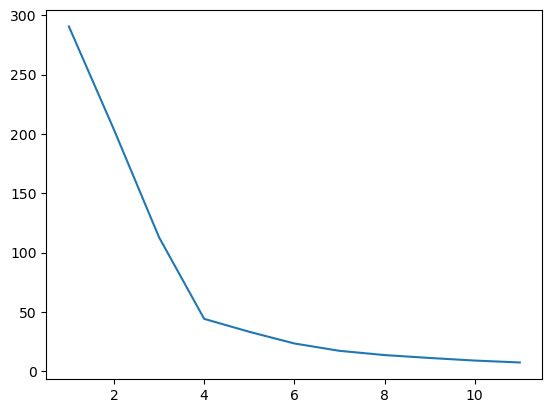

In [31]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k, inertia2)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, same value from the original

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [33]:
# Fit the K-Means model using the PCA data
model.fit(clusters_pca_df)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k5 = model.predict(clusters_pca_df)
# Print the resulting array of cluster values.
k5

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [35]:
# Create a copy of the DataFrame with the PCA data
copy_cluster_pca_df = clusters_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_cluster_pca_df['predicted_clusters'] = k5

# Display sample data
copy_cluster_pca_df

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1
binancecoin,0.822871,-1.682096,-0.905203,1
chainlink,0.913868,-1.128684,-2.730038,1
cardano,0.811102,-1.113378,-1.598655,1
litecoin,0.258728,-0.946884,-1.103560,1


In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
copy_cluster_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols="coin_id"
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 